# Endmember Construction

In [1]:
import os,sys
import pandas as pd
import numpy as np
import sympy as sym
import time
import re
import types
import ast
import sys
from thermocodegen.coder import coder
sym.init_printing()

sys.path.append(os.path.join(os.path.pardir, 'python'))
from tcg_slb.endmember import SLBEndmember

#pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

In [2]:
reference= 'View_SLBEndmember' 

In [3]:
df = pd.read_csv(os.path.join(os.path.pardir, 'database', 'data', 'slb_endmembers.csv'),skipinitialspace=True)
df

,name,formula,a0,n,v0,k00,k0p,theta0,gamma0,q,refS,T_r,V_r,TC0,VD,SD
0,Anorthite,Ca(1)Al(2)Si(2)O(8),-4014619.0,13.0,10.061000,840891.5,4.00000,752.3911,0.39241,1.00000,0.0,300.0,10.061000,NaN,NaN,NaN
1,Albite,Na(1)Al(1)Si(3)O(8),-3718799.0,13.0,10.045200,597616.2,4.00000,713.7824,0.56704,1.00000,0.0,300.0,10.045200,NaN,NaN,NaN
2,MgSpinel,Mg(4)Al(8)O(16),-8667568.0,28.0,15.904800,1969428.0,5.68282,842.8104,1.02283,2.71208,0.0,300.0,15.904800,NaN,NaN,NaN
3,Hercynite,Fe(4)Al(8)O(16),-7324009.0,28.0,16.337200,2088965.0,5.68282,763.2310,1.21719,2.71208,0.0,300.0,16.337200,NaN,NaN,NaN
4,Forsterite,Mg(2)Si(1)O(4),-2055403.0,7.0,4.360300,1279555.0,4.21796,809.1703,0.99282,2.10672,0.0,300.0,4.360300,NaN,NaN,NaN
5,Fayalite,Fe(2)Si(1)O(4),-1370519.0,7.0,4.629000,1349622.0,4.21796,618.7007,1.06023,3.64660,0.0,300.0,4.629000,NaN,NaN,NaN
6,MgWadsleyite,Mg(2)Si(1)O(4),-2027837.0,7.0,4.051500,1686948.0,4.32290,843.4973,1.20610,2.01880,0.0,300.0,4.051500,NaN,NaN,NaN
7,FeWadsleyite,Fe(2)Si(1)O(4),-1364668.0,7.0,4.280000,1685910.0,4.32290,665.4492,1.20610,2.01880,0.0,300.0,4.280000,NaN,NaN,NaN
8,MgRingwoodite,Mg(2)Si(1)O(4),-2017557.0,7.0,3.949300,1849009.0,4.22035,877.7094,1.10791,2.39140,0.0,300.0,3.949300,NaN,NaN,NaN
9,FeRingwoodite,Fe(2)Si(1)O(4),-1362772.0,7.0,4.186000,2134120.0,4.22035,677.7177,1.27193,2.39140,0.0,300.0,4.186000,NaN,NaN,NaN


## Example: Forsterite

In [4]:
values_dict = df.loc[df['name']=='Forsterite'].reset_index(drop=True).iloc[0].to_dict()
fo = SLBEndmember(reference=reference,**values_dict)

Isotropic strain contributions to the Helmholtz free energy:

In [5]:
fo.A_iso_default()

Quasiharmonic approximation to the Helmholtz free energy:

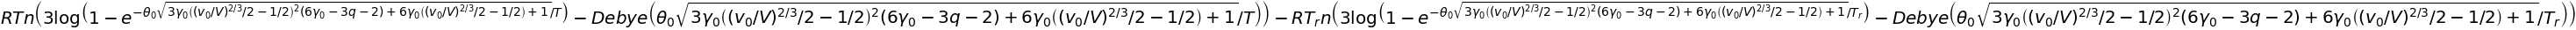

In [6]:
fo.A_quasi_default()

Magnetic contribution from Iron atoms:

In [7]:
fo.A_mag_default()

Total Helmholtz free energy model:

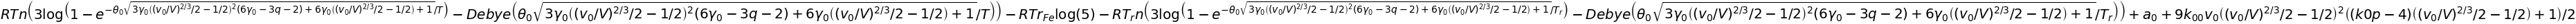

In [8]:
fo.A_default()

In [9]:
fo.params()

[('a0', 'J/m', a0),
 ('n', '', n),
 ('v0', 'J/bar-m', v0),
 ('k00', 'bar', k00),
 ('k0p', '', k0p),
 ('theta0', 'K', theta0),
 ('gamma0', '', gamma0),
 ('q', '', q),
 ('r_Fe', '', r_Fe),
 ('R', 'J/K-m', R)]

In [10]:
fo.values_dict()

{'name': 'Forsterite',
 'formula': 'Mg(2)Si(1)O(4)',
 'reference': 'View_SLBEndmember',
 'a0': -2055403.0,
 'n': 7.0,
 'v0': 4.3603000000000005,
 'k00': 1279555.0,
 'k0p': 4.21796,
 'theta0': 809.1703,
 'gamma0': 0.99282,
 'q': 2.10672,
 'T_r': 300.0,
 'V_r': 4.3603000000000005,
 'r_Fe': 0,
 'R': 8.31446261815324}